In [6]:
import sys
sys.path.append('unfolding')

import ROOT
import numpy as np
import matplotlib.pyplot as plt
import data_handler as dh
from omnifold import binned_omnifold, unbinned_omnifold
import mplhep as hep
hep.style.use(hep.style.CMS)

import energyflow as ef

## Settings

In [7]:
smearing_function = "smear"
N_events = 10000

In [8]:
match smearing_function:
    case "calo":
        sim_bins = 40
        MC_bins = 40
        sim_low = 0
        sim_high = 10
        MC_low = 0
        MC_high = 10
    case "smear":
        sim_bins = 40
        MC_bins = 40
        sim_low = -10
        sim_high = 10
        MC_low = -10
        MC_high = 10

## Data from Pythia & Herwig

In [9]:
#Data Loading
pythia = ef.zjets_delphes.load('Pythia26', num_data=N_events, cache_dir="./", pad=True) # Generator
herwig = ef.zjets_delphes.load('Herwig', num_data=N_events, cache_dir="./", pad=True)  # Detector

labels = [
    r"$p_\mathrm{Tjet}$", r"$y_\mathrm{jet}$", r"$\phi_\mathrm{jet}$",
    r"$m_\mathrm{jet}$", r"$m_\mathrm{groomed}$",r"$Mult_\mathrm{jet}$"
]

sim_data = np.column_stack((pythia['sim_jets'], pythia['sim_zgs'], pythia['sim_mults'])) # Detector Simulation 
mc_data = np.column_stack((pythia['gen_jets'], pythia['gen_zgs'], pythia['gen_mults'])) # Monte Carlo Truth Level
measured_data = np.column_stack((herwig['sim_jets'], herwig['sim_zgs'], herwig['sim_mults'])) # Experimental Data
true_data = np.column_stack((herwig['gen_jets'], herwig['gen_zgs'], herwig['gen_mults'])) # True Distribution


#Unbinned Data
sim_data_p_Tjet, sim_data_y_jet, sim_data_phi_jet, sim_data_m_jet, sim_data_m_groomed, sim_data_mult_jet = [], [], [], [], [], []
mc_data_p_Tjet, mc_data_y_jet, mc_data_phi_jet, mc_data_m_jet, mc_data_m_groomed, mc_data_mult_jet = [], [], [], [], [], []
measured_data_p_Tjet, measured_data_y_jet, measured_data_phi_jet, measured_data_m_jet, measured_data_m_groomed, measured_data_mult_jet = [], [], [], [], [], []
true_data_p_Tjet, true_data_y_jet, true_data_phi_jet, true_data_m_jet, true_data_m_groomed, true_data_mult_jet = [], [], [], [], [], []


for i in range(len(sim_data)):
    sim_data_p_Tjet.append(sim_data[i][0])
    sim_data_y_jet.append(sim_data[i][1])
    sim_data_phi_jet.append(sim_data[i][2])
    sim_data_m_jet.append(sim_data[i][3])
    sim_data_m_groomed.append(sim_data[i][4])
    sim_data_mult_jet.append(sim_data[i][5])

for i in range(len(mc_data)):
    mc_data_p_Tjet.append(mc_data[i][0])
    mc_data_y_jet.append(mc_data[i][1])
    mc_data_phi_jet.append(mc_data[i][2])
    mc_data_m_jet.append(mc_data[i][3])
    mc_data_m_groomed.append(mc_data[i][4])
    mc_data_mult_jet.append(mc_data[i][5])

for i in range(len(measured_data)):
    measured_data_p_Tjet.append(measured_data[i][0])
    measured_data_y_jet.append(measured_data[i][1])
    measured_data_phi_jet.append(measured_data[i][2])
    measured_data_m_jet.append(measured_data[i][3])
    measured_data_m_groomed.append(measured_data[i][4])
    measured_data_mult_jet.append(measured_data[i][5])

for i in range(len(true_data)):
    true_data_p_Tjet.append(true_data[i][0])
    true_data_y_jet.append(true_data[i][1])
    true_data_phi_jet.append(true_data[i][2])
    true_data_m_jet.append(true_data[i][3])
    true_data_m_groomed.append(true_data[i][4])
    true_data_mult_jet.append(true_data[i][5])


#Binned Data
sim_data_p_Tjet_binned = ROOT.TH1D("sim_p_Tjet_hist", "sim_p_Tjet_hist", sim_bins, sim_low, sim_high)
sim_data_y_jet_binned = ROOT.TH1D("sim_y_jet_hist", "sim_y_jet_hist", sim_bins, sim_low, sim_high)
sim_data_phi_jet_binned = ROOT.TH1D("sim_phi_jet_hist", "sim_phi_jet_hist", sim_bins, sim_low, sim_high)
sim_data_m_jet_binned = ROOT.TH1D("sim_m_jet_hist", "sim_m_jet_hist", sim_bins, sim_low, sim_high)
sim_data_m_groomed_binned = ROOT.TH1D("sim_m_groomed_hist", "sim_m_groomed_hist", sim_bins, sim_low, sim_high)
sim_data_mult_jet_binned = ROOT.TH1D("sim_mult_jet_hist", "sim_mult_jet_hist", sim_bins, sim_low, sim_high)

mc_data_p_Tjet_binned = ROOT.TH1D("mc_p_Tjet_hist", "mc_p_Tjet_hist", MC_bins, MC_low, MC_high)
mc_data_y_jet_binned = ROOT.TH1D("mc_y_jet_hist", "mc_y_jet_hist", MC_bins, MC_low, MC_high)
mc_data_phi_jet_binned = ROOT.TH1D("mc_phi_jet_hist", "mc_phi_jet_hist", MC_bins, MC_low, MC_high)
mc_data_m_jet_binned = ROOT.TH1D("mc_m_jet_hist", "mc_m_jet_hist", MC_bins, MC_low, MC_high)
mc_data_m_groomed_binned = ROOT.TH1D("mc_m_groomed_hist", "mc_m_groomed_hist", MC_bins, MC_low, MC_high)
mc_data_mult_jet_binned = ROOT.TH1D("mc_mult_jet_hist", "mc_mult_jet_hist", MC_bins, MC_low, MC_high)

measured_data_p_Tjet_binned = ROOT.TH1D("measured_p_Tjet_hist", "measured_p_Tjet_hist", sim_bins, sim_low, sim_high)
measured_data_y_jet_binned = ROOT.TH1D("measured_y_jet_hist", "measured_y_jet_hist", sim_bins, sim_low, sim_high)
measured_data_phi_jet_binned = ROOT.TH1D("measured_phi_jet_hist", "measured_phi_jet_hist", sim_bins, sim_low, sim_high)
measured_data_m_jet_binned = ROOT.TH1D("measured_m_jet_hist", "measured_m_jet_hist", sim_bins, sim_low, sim_high)
measured_data_m_groomed_binned = ROOT.TH1D("measured_m_groomed_hist", "measured_m_groomed_hist", sim_bins, sim_low, sim_high)
measured_data_mult_jet_binned = ROOT.TH1D("measured_mult_jet_hist", "measured_mult_jet_hist", sim_bins, sim_low, sim_high)

true_data_p_Tjet_binned = ROOT.TH1D("true_p_Tjet_hist", "true_p_Tjet_hist", MC_bins, MC_low, MC_high)
true_data_y_jet_binned = ROOT.TH1D("true_y_jet_hist", "true_y_jet_hist", MC_bins, MC_low, MC_high)
true_data_phi_jet_binned = ROOT.TH1D("true_phi_jet_hist", "true_phi_jet_hist", MC_bins, MC_low, MC_high)
true_data_m_jet_binned = ROOT.TH1D("true_m_jet_hist", "true_m_jet_hist", MC_bins, MC_low, MC_high)
true_data_m_groomed_binned = ROOT.TH1D("true_m_groomed_hist", "true_m_groomed_hist", MC_bins, MC_low, MC_high)
true_data_mult_jet_binned = ROOT.TH1D("true_mult_jet_hist", "true_mult_jet_hist", MC_bins, MC_low, MC_high)


for i in range(len(sim_data_p_Tjet)):
    sim_data_p_Tjet_binned.Fill(sim_data_p_Tjet[i])
    sim_data_y_jet_binned.Fill(sim_data_y_jet[i])
    sim_data_phi_jet_binned.Fill(sim_data_phi_jet[i])
    sim_data_m_jet_binned.Fill(sim_data_m_jet[i])
    sim_data_m_groomed_binned.Fill(sim_data_m_groomed[i])
    sim_data_mult_jet_binned.Fill(sim_data_mult_jet[i])

for i in range(len(mc_data_p_Tjet)):
    mc_data_p_Tjet_binned.Fill(mc_data_p_Tjet[i])
    mc_data_y_jet_binned.Fill(mc_data_y_jet[i])
    mc_data_phi_jet_binned.Fill(mc_data_phi_jet[i])
    mc_data_m_jet_binned.Fill(mc_data_m_jet[i])
    mc_data_m_groomed_binned.Fill(mc_data_m_groomed[i])
    mc_data_mult_jet_binned.Fill(mc_data_mult_jet[i])

for i in range(len(measured_data_p_Tjet)):
    measured_data_p_Tjet_binned.Fill(measured_data_p_Tjet[i])
    measured_data_y_jet_binned.Fill(measured_data_y_jet[i])
    measured_data_phi_jet_binned.Fill(measured_data_phi_jet[i])
    measured_data_m_jet_binned.Fill(measured_data_m_jet[i])
    measured_data_m_groomed_binned.Fill(measured_data_m_groomed[i])
    measured_data_mult_jet_binned.Fill(measured_data_mult_jet[i])

for i in range(len(true_data_p_Tjet)):
    true_data_p_Tjet_binned.Fill(true_data_p_Tjet[i])
    true_data_y_jet_binned.Fill(true_data_y_jet[i])
    true_data_phi_jet_binned.Fill(true_data_phi_jet[i])
    true_data_m_jet_binned.Fill(true_data_m_jet[i])
    true_data_m_groomed_binned.Fill(true_data_m_groomed[i])
    true_data_mult_jet_binned.Fill(true_data_mult_jet[i])

p_Tjet_response = ROOT.RooUnfoldResponse(sim_bins, sim_low, sim_high, MC_bins, MC_low, MC_high)
y_jet_response = ROOT.RooUnfoldResponse(sim_bins, sim_low, sim_high, MC_bins, MC_low, MC_high)
phi_jet_response = ROOT.RooUnfoldResponse(sim_bins, sim_low, sim_high, MC_bins, MC_low, MC_high)
m_jet_response = ROOT.RooUnfoldResponse(sim_bins, sim_low, sim_high, MC_bins, MC_low, MC_high)
m_groomed_response = ROOT.RooUnfoldResponse(sim_bins, sim_low, sim_high, MC_bins, MC_low, MC_high)
mult_jet_response = ROOT.RooUnfoldResponse(sim_bins, sim_low, sim_high, MC_bins, MC_low, MC_high)

Warning in <TROOT::Append>: Replacing existing TH1: sim_p_Tjet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sim_y_jet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sim_phi_jet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sim_m_jet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sim_m_groomed_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sim_mult_jet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mc_p_Tjet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mc_y_jet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mc_phi_jet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mc_m_jet_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mc_m_groomed_hist (

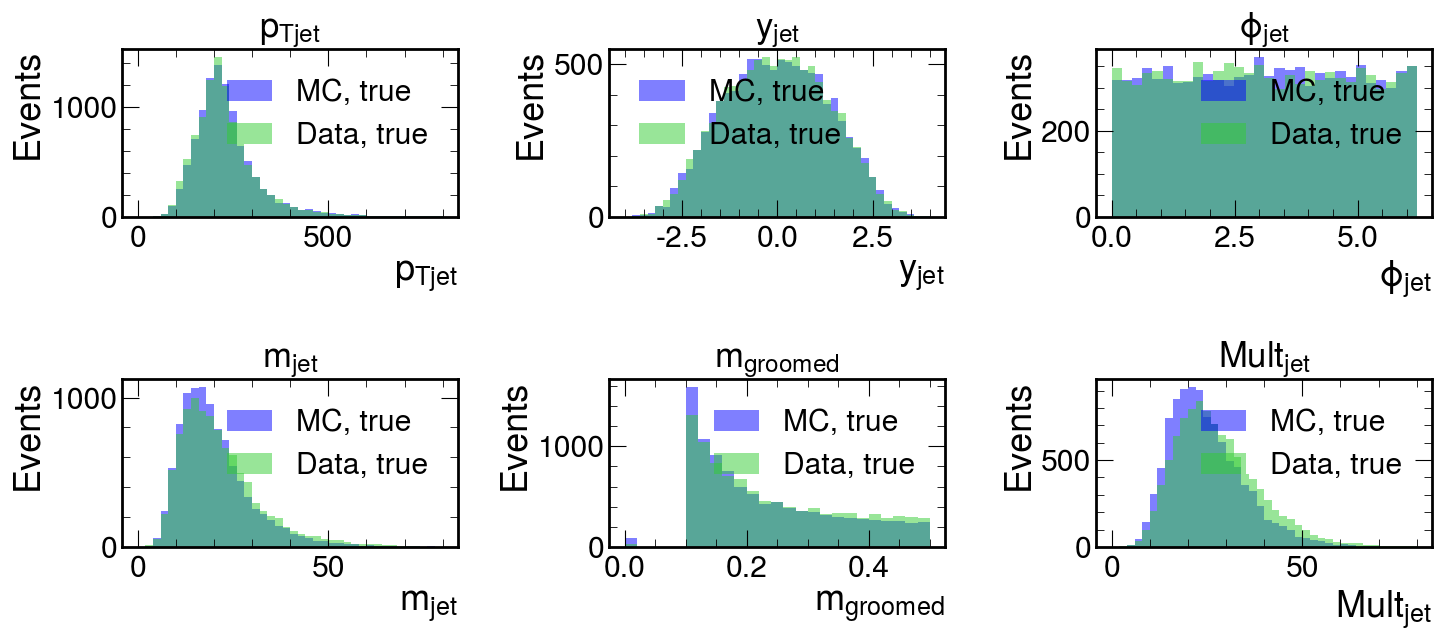

In [10]:
binning = [ #simple plotting bins
np.linspace(0, 800,  41),   #jet pT
np.linspace(-4, 4, 41),     #jet y
np.linspace(0.0, 6.2, 31),  #jet phi
np.linspace(0, 80,  41),    #jet mass
np.linspace(0, 0.5, 26),    # groomed mass
np.linspace(0, 80, 41)      # multiplicity
]

labels = [
    r"$p_\mathrm{Tjet}$",
    r"$y_\mathrm{jet}$",
    r"$\phi_\mathrm{jet}$",
    r"$m_\mathrm{jet}$",
    r"$m_\mathrm{groomed}$",
    r"$Mult_\mathrm{jet}$"]
    

N = len(binning)

fig, axes = plt.subplots(2, 3, figsize=(15,7))

for i,ax in enumerate(axes.ravel()):
    if (i >= N): break
    _,_,_=ax.hist(mc_data[:,i],binning[i],color='blue',alpha=0.5,label="MC, true")
    _,_,_=ax.hist(true_data[:,i],binning[i],color='limegreen',alpha=0.5,label="Data, true")

    ax.set_title(labels[i],fontsize=25)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Events")
    ax.legend(frameon=False)
    
fig.tight_layout()

## Binned Omnifold w/ Decision Trees

In [11]:
num_iterations = 5

In [12]:
binned_weights, MC_entries, _ = binned_omnifold(response, measured_hist, num_iterations)
# Applying weights to MC data
omnifold_MC_hist_binned, omnifold_MC_bin_edges_binned = np.histogram(MC_entries.flatten(), weights = binned_weights[-1][1], bins = MC_bins, range = [MC_low, MC_high])
omnifold_MC_bin_centers_binned = (omnifold_MC_bin_edges_binned[:-1] + omnifold_MC_bin_edges_binned[1:]) / 2

# Accounting for efficiencies
efficiencies = response.Vefficiency()
efficiencies_np = np.empty(efficiencies.GetNoElements())
for i in range(efficiencies.GetNoElements()):
    efficiencies_np[i] = efficiencies[i]
omnifold_MC_hist_binned = np.divide(omnifold_MC_hist_binned, efficiencies_np, out=np.zeros_like(omnifold_MC_hist_binned, dtype=np.float32), where=efficiencies_np!=0)

NameError: name 'response' is not defined

## Unbinned Omnifold w/ Decision Trees

In [ ]:
# Getting weights from omnifold
unbinned_weights, MC_entries_unbinned, sim_entries_unbinned = unbinned_omnifold(
    mc_data,
    unbinned_sim_data,
    unbinned_measured_data,
    pass_reco_mask,
    num_iterations
)